In [5]:
!pip install prophet

#fb prophet Facebook tarafından geliştirilen zaman serisi tahmin (forecasting) kütüphanesidir.

Defaulting to user installation because normal site-packages is not writeable
  Using cached holidays-0.74-py3-none-any.whl.metadata (39 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.3/13.3 MB 3.9 MB/s eta 0:00:04
   ------- -------------------------------- 2.6/13.3 MB 5.0 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/13.3 MB 5.0 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/13.3 MB 5.2 MB/s eta 0:00:02
   ----------------- ---------------------- 5.8/13.3 MB 5.0 MB/s eta 0:00:02
   ------------------- -------------------- 6.6/13.3 MB 4.9 MB/s eta 0:00:02
   ---------------------- ----------------- 7.6/13.3 MB 4.8 MB/s eta 0:00:02
   ------------------------- -------------- 8.4/13.3 MB 4.8 MB/s eta 0:00:02
   ---------------------------- ----------- 9.4/13.3 MB 4.8 MB/s eta 0:00:01
   -----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
!pip install yfinance

#yfinance Yahoo Finance verilerini Python üzerinden çekmeye yarayan bir kütüphanedir.

Defaulting to user installation because normal site-packages is not writeable


In [7]:
from prophet import Prophet
import yfinance as yf

In [10]:
df = yf.download('BTC-USD',"2015-01-01","2025-06-10") # bitcoin'in belirtilen tarih aralığındaki değerlemesini içeren bir df'e ulaştım ve bunu
# df adındaki bir değişkene atadım

C:\Users\EmnCn\AppData\Local\Temp\ipykernel_7060\3517842663.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('BTC-USD',"2015-01-01","2025-06-10")
[*********************100%***********************]  1 of 1 completed


In [11]:
# bize gereken kapanış verileri ve tarih. O yüzden df'i düzenliyoruz.

df = df[["Close"]]

In [12]:
# tarih sütunu şu an index, onu sütun haline getireceğiz.
df = df.reset_index()

In [13]:
df.head(3
    )

Price,Date,Close
Ticker,,BTC-USD
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001


In [14]:
df.columns=['ds','y'] # sütun isimlerini değiştirdim

In [15]:
df.head(5)

,ds,y
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001
3,2015-01-04,264.195007
4,2015-01-05,274.473999


In [16]:
model = Prophet() # prophet modelinden bir nesne oluşturuyorum

In [17]:
model.fit(df)

00:46:28 - cmdstanpy - INFO - Chain [1] start processing
00:46:29 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
gelecek = model.make_future_dataframe(360) # 360 günlük bir tahmin yapacağımı ifade ediyorum.
tahmin = model.predict(gelecek)

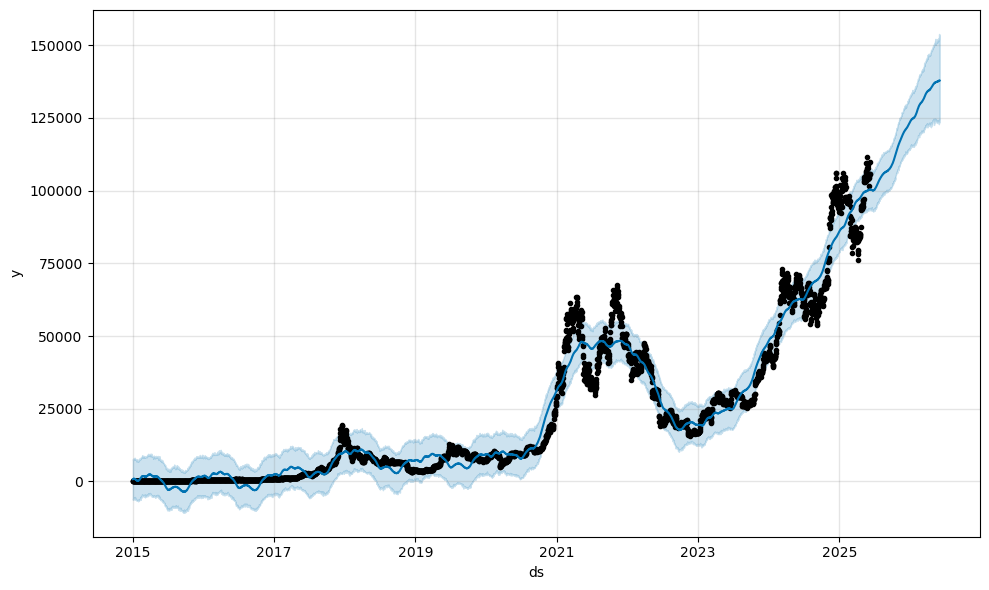

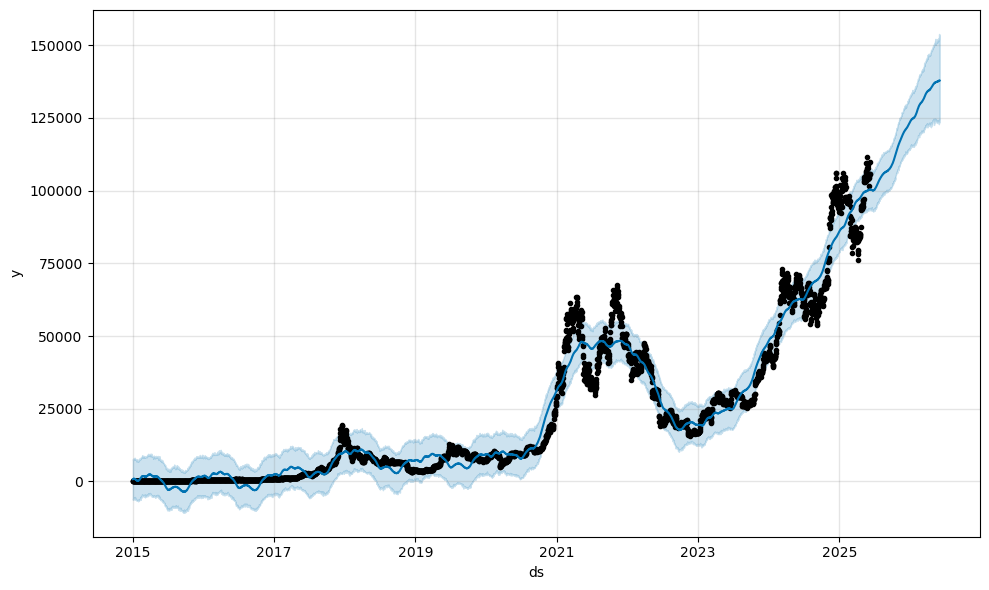

In [21]:
model.plot(tahmin) # yapılmış olan tahminlemenin görselleştirilmesi

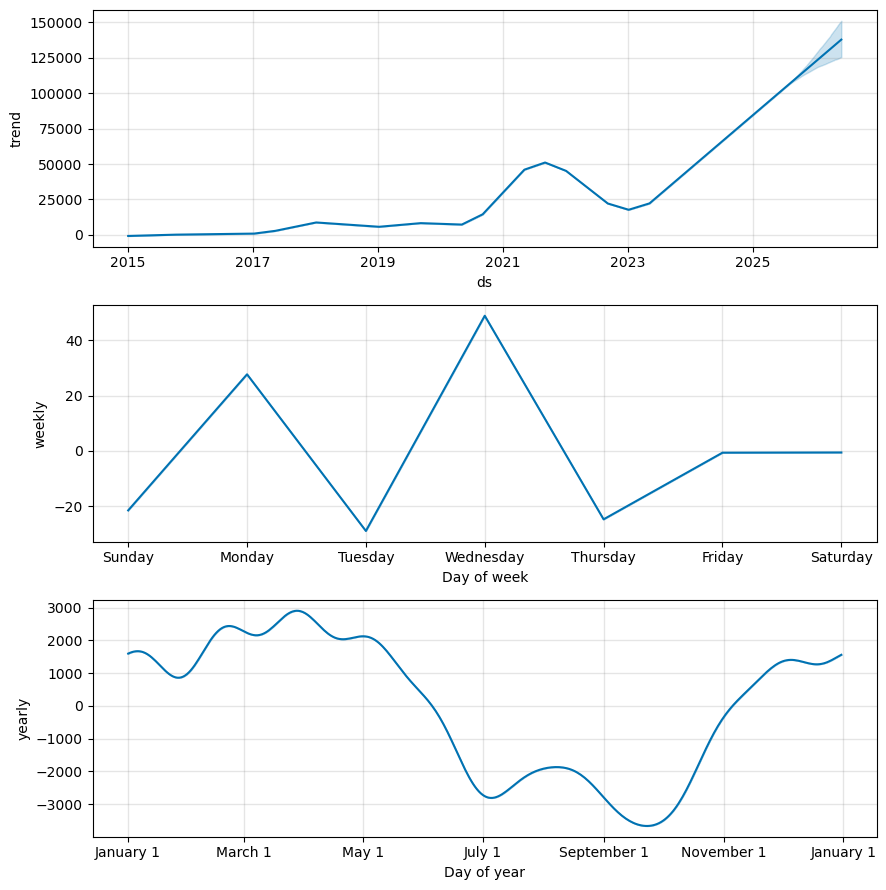

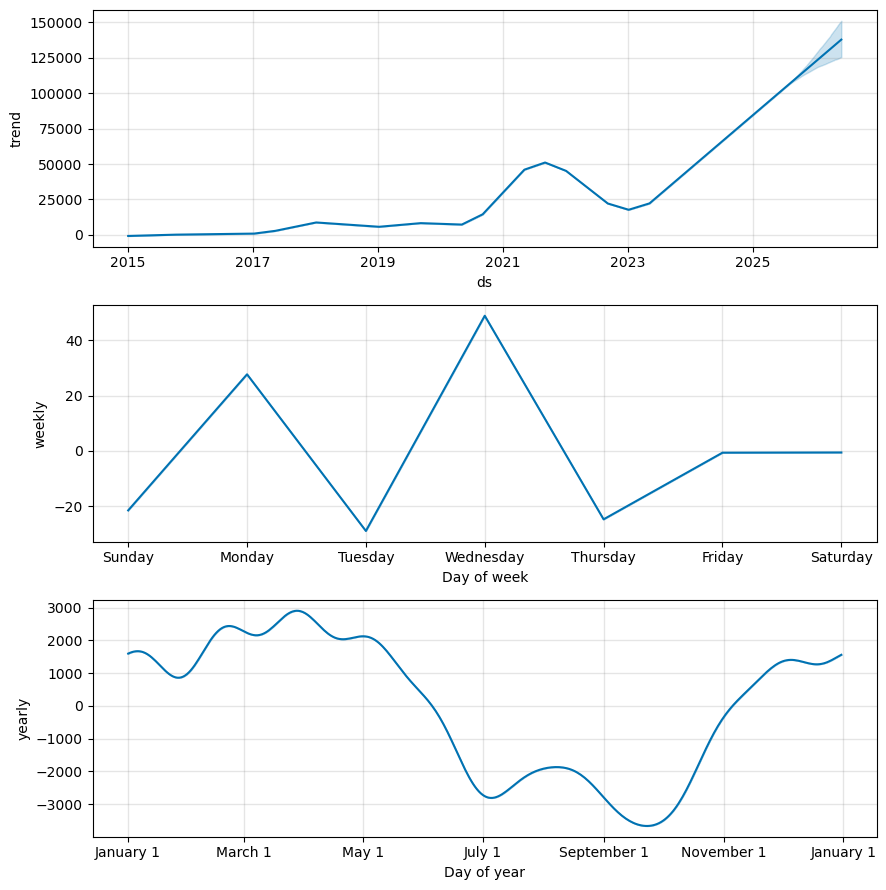

In [22]:
model.plot_components(tahmin) # birçok komponentin görselleştirmesini sağladım.